In [1]:
# Import necessary libraries for data manipulation, visualization, and model evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from pathlib import Path

# Set display options to show all columns for dataframes
pd.set_option('display.max_columns', None)

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Configure display settings to show the full dataframe when printed
pd.set_option('display.max_columns', None)  # Display all columns
# pd.set_option('display.max_rows', None)   # Uncomment to display all rows
pd.set_option('display.max_rows', 200)      # Display up to 200 rows


In [2]:
# Define the data path
DATA_PATH = Path('')

# Load the training and test datasets
train = pd.read_csv(DATA_PATH / '/Users/aarononosala/Downloads/airqo-african-air-quality-prediction-challenge20240404-4917-1iz5pyf/Train.csv')
test = pd.read_csv(DATA_PATH / '/Users/aarononosala/Downloads/airqo-african-air-quality-prediction-challenge20240404-4917-1iz5pyf/Test.csv')

# Convert the 'date' column to datetime format for both datasets
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])


In [4]:
# Sort the training dataset by 'date' and 'city' columns
train.sort_values(['date', 'city'], inplace=True)

# Display the unique cities present in the 'city' column of the training dataset
unique_cities = train['city'].unique()
unique_cities


array(['Kampala', 'Nairobi', 'Lagos', 'Bujumbura'], dtype=object)

In [38]:
# Extract the day of the year and month from the 'date' column and create new columns in the training dataset
train['date_day'] = train['date'].dt.day_of_year
train['date_month'] = train['date'].dt.month

# Extract the day of the year and month from the 'date' column and create new columns in the test dataset
test['date_day'] = test['date'].dt.day_of_year
test['date_month'] = test['date'].dt.month

# Calculate the mean of 'pm2_5' for each day of the year in the training dataset
x = train[['date_day', 'pm2_5']].groupby('date_day').mean()

# Display the 'pm2_5' values for the city of Kampala in the training dataset
kampala_pm2_5 = train[train['city'] == 'Kampala']['pm2_5']
kampala_pm2_5


596     13.73180
878     15.46720
1711    15.66390
2115    23.62720
2244    16.13590
          ...   
6088    32.07730
6351    20.23585
6549    24.82630
6858    24.15020
7074    37.60350
Name: pm2_5, Length: 5596, dtype: float64

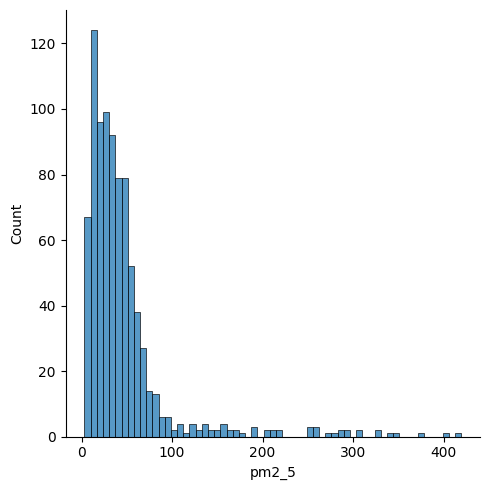

In [7]:
# Plot the distribution of 'pm2_5' values for the city of Lagos in the training dataset
sns.displot(train[train['city'] == 'Lagos']['pm2_5'])


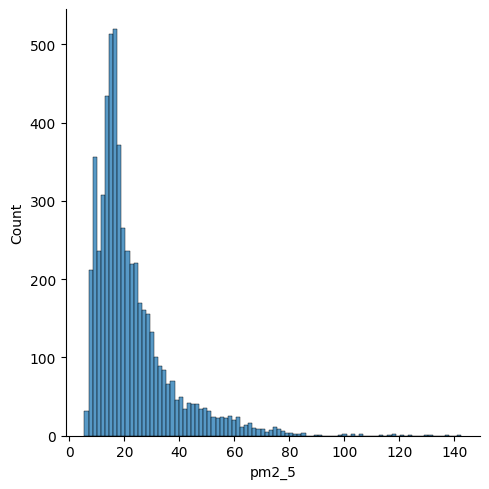

In [8]:
# Plot the distribution of 'pm2_5' values for the city of Kampala in the training dataset
sns.displot(train[train['city'] == 'Kampala']['pm2_5'])


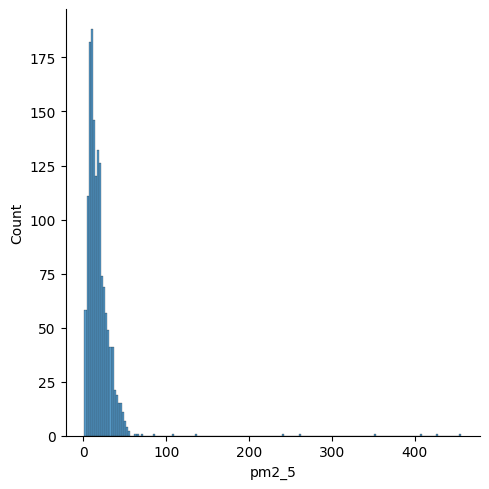

In [9]:
# Plot the distribution of 'pm2_5' values for the city of Nairobi in the training dataset
sns.displot(train[train['city'] == 'Nairobi']['pm2_5'])


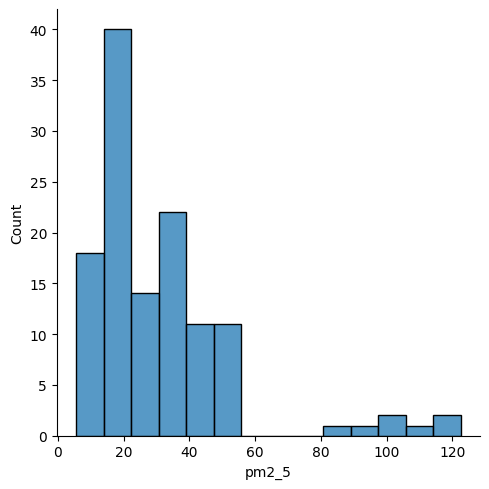

In [10]:
# Plot the distribution of 'pm2_5' values for the city of Bujumbura in the training dataset
sns.displot(train[train['city'] == 'Bujumbura']['pm2_5'])


- notice that the standatd deviation is quite low but it increased in the 4th year quarter, this increament occures because most companies uses their  maximum allowable amount of pollutants in the last quarter of the year

<Axes: xlabel='date_day', ylabel='pm2_5'>

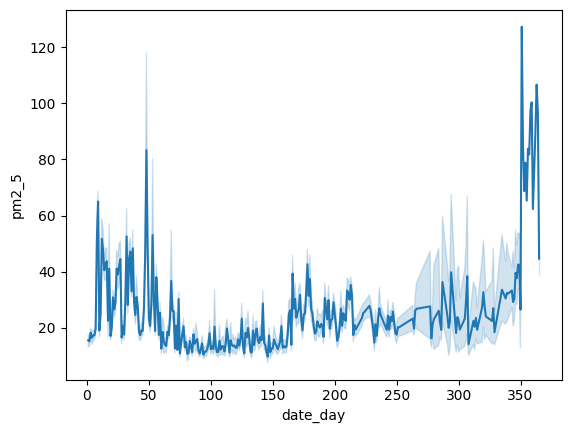

In [11]:
# Plot a line plot of 'pm2_5' values against 'date_day' in the training dataset
sns.lineplot(x=train['date_day'], y=train['pm2_5'])


<Axes: xlabel='date_day', ylabel='pm2_5'>

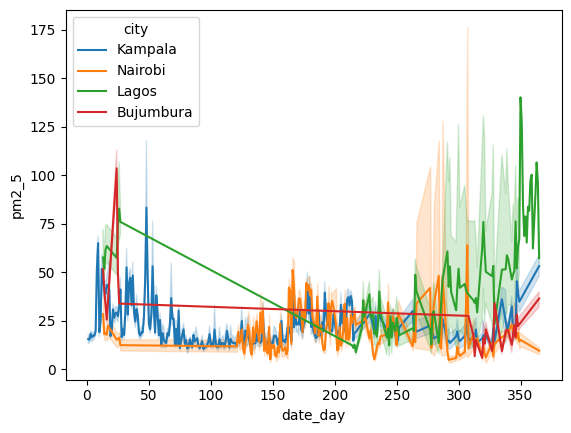

In [12]:
# Plot a line plot of 'pm2_5' values against 'date_day', with different lines for each city
sns.lineplot(x=train['date_day'], y=train['pm2_5'], hue=train['city'])


<Axes: xlabel='date', ylabel='pm2_5'>

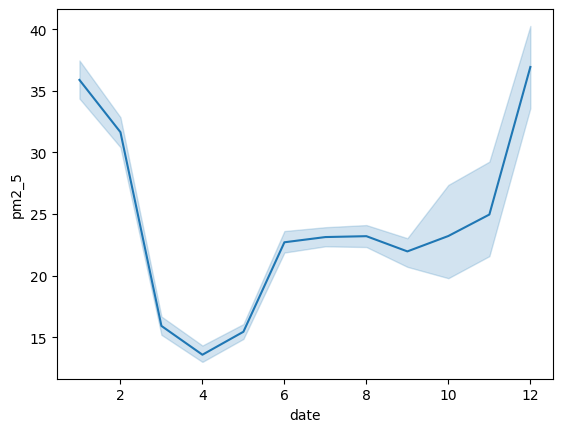

In [13]:
# Plot a line plot of 'pm2_5' values against the month of the year from the 'date' column
sns.lineplot(x=train['date'].dt.month, y=train['pm2_5'])


<Axes: xlabel='date', ylabel='pm2_5'>

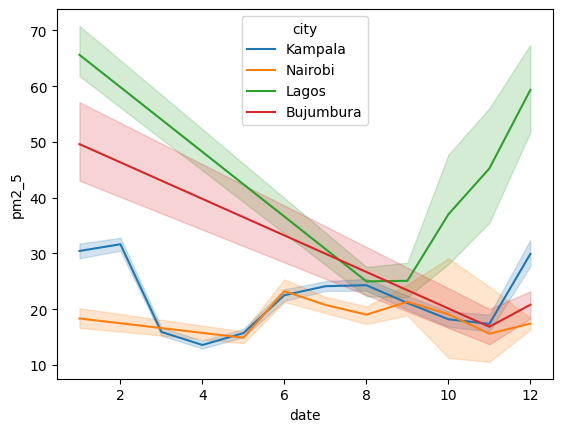

In [14]:
# Plot a line plot of 'pm2_5' values against the month of the year, with different lines for each city
sns.lineplot(x=train['date'].dt.month, y=train['pm2_5'], hue=train['city'])


In [15]:
# Generate descriptive statistics for the 'pm2_5' column in the training dataset
train['pm2_5'].describe()


count    8071.000000
mean       24.639296
std        24.878920
min         1.200000
25%        13.270600
50%        18.375400
75%        28.838400
max       456.193333
Name: pm2_5, dtype: float64

<Axes: xlabel='hour', ylabel='pm2_5'>

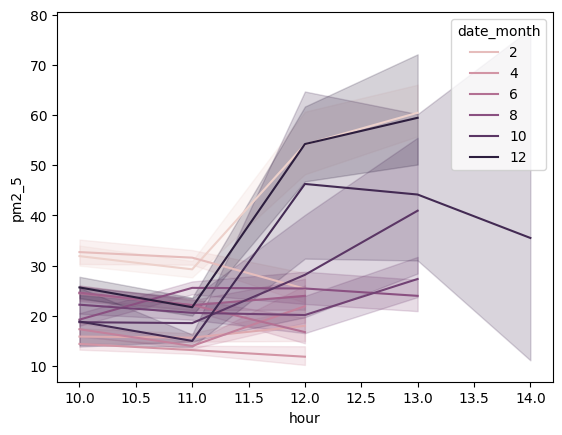

In [16]:
# Plot a line plot of 'pm2_5' values against 'hour', with lines colored by the month of the year
sns.lineplot(x=train['hour'], y=train['pm2_5'], hue=train['date_month'])


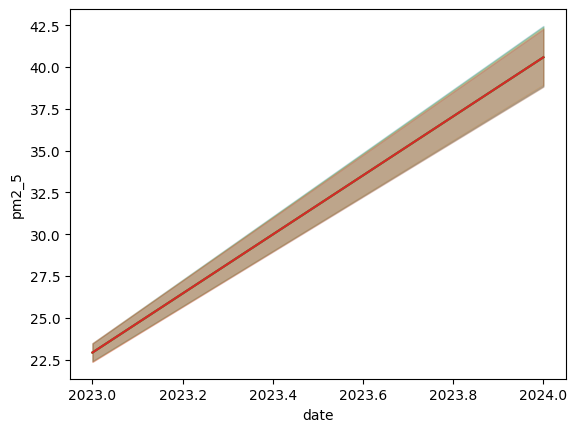

In [17]:
# Generate line plots of PM2.5 levels over time for each unique city in the training dataset. 
# The x-axis represents the year, and the y-axis represents PM2.5 levels.
for city in train['city'].unique():
    sns.lineplot(data=train[train['city'] == city], x='date', y='pm2_5', label=city)


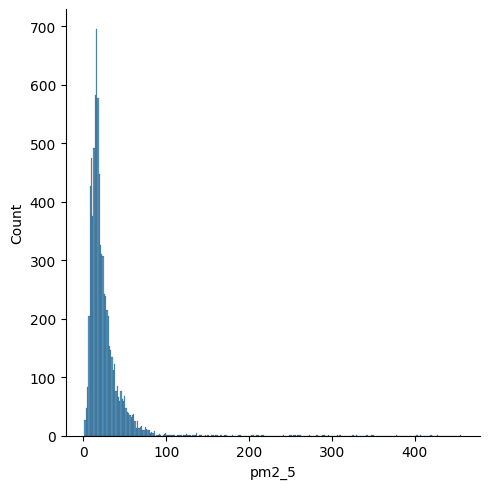

In [20]:
# Plotting the distribution of PM2.5 levels in the training dataset.
sns.displot(train['pm2_5'], kde=True)


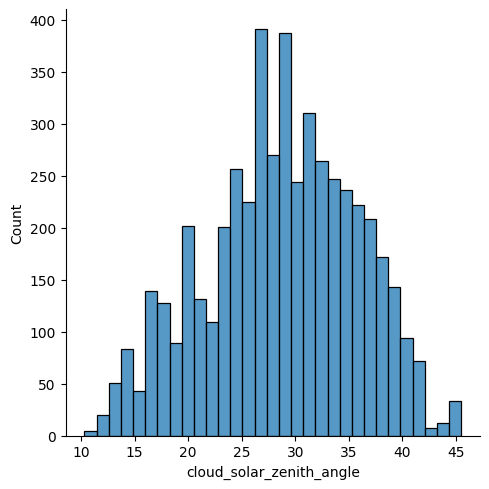

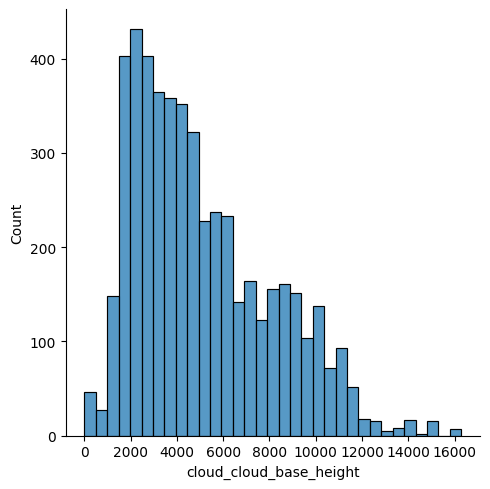

In [22]:
# Plotting the distribution of 'cloud_solar_zenith_angle' in the training dataset.
# The plot includes a histogram with a KDE curve to visualize the density of the data.
sns.displot(train['cloud_solar_zenith_angle'])
plt.show()  # Display the plot

# Plotting the distribution of 'cloud_cloud_base_height' in the training dataset.
# This plot also includes a histogram with a KDE curve to illustrate the data density.
sns.displot(train['cloud_cloud_base_height'])


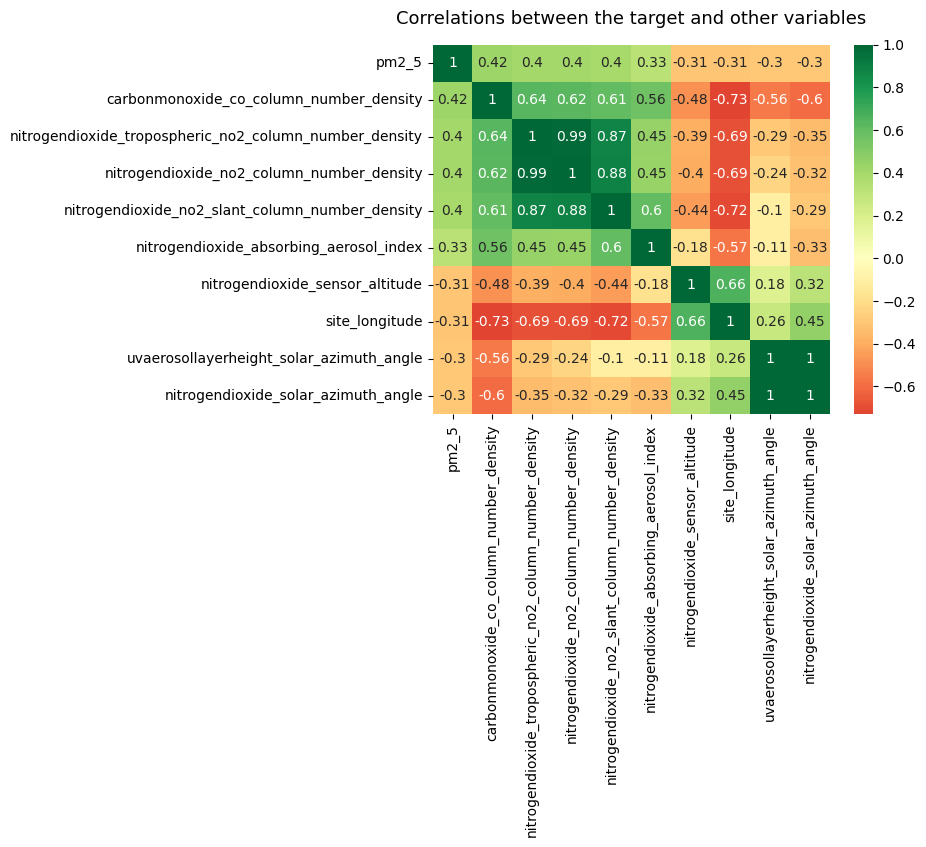

In [24]:
# Select numerical features from the training dataset
train_num_df = train.select_dtypes(include=['number'])

# Compute the absolute correlations of numerical features with 'pm2_5'
top10_corrs = abs(train_num_df.corr()['pm2_5']).sort_values(ascending=False).head(10)

# Compute the correlation matrix for the top 10 features
corr = train_num_df[list(top10_corrs.index)].corr()

# Plot a heatmap of the correlation matrix
# The heatmap visualizes the correlations between 'pm2_5' and other top features
# 'RdYlGn' colormap is used with annotations and centered at 0 for better clarity
sns.heatmap(corr, cmap='RdYlGn', annot=True, center=0)
plt.title('Correlations between the target and other variables', pad=15, fontdict={'size': 13})
plt.show()


<Axes: >

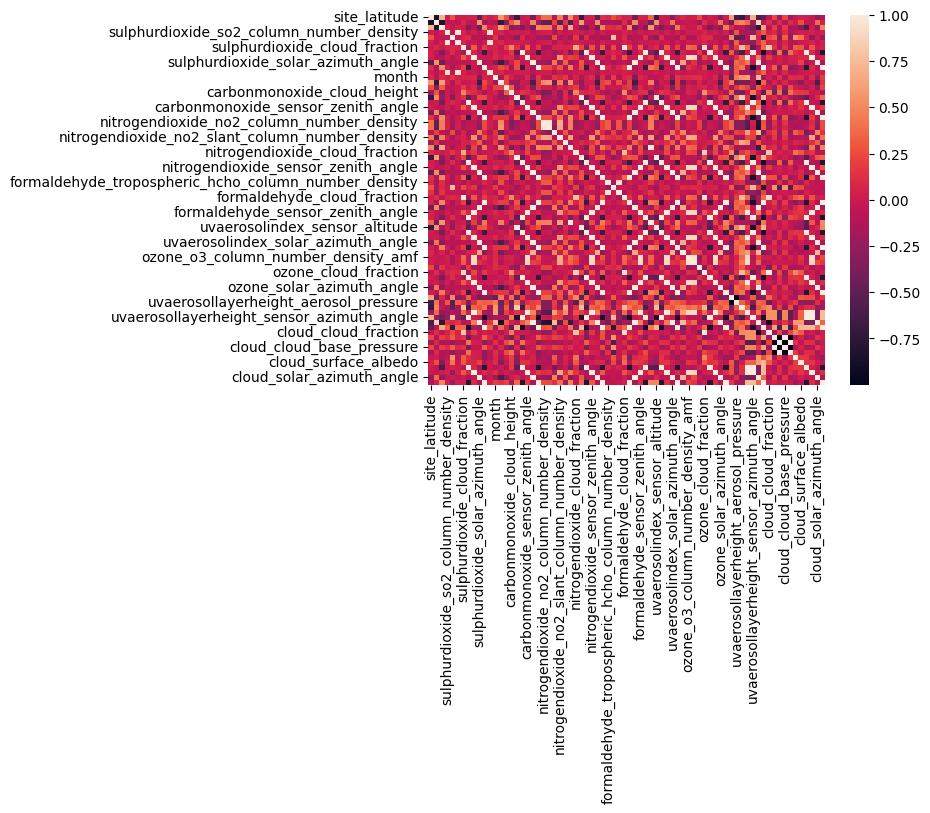

In [26]:
# Plot a heatmap of the correlation matrix for numerical features in the test dataset
# The heatmap visualizes correlations between numerical features with a specified linewidth for better clarity
sns.heatmap(test.select_dtypes(include='number').corr(), linewidths=0.0028105)


city
Bujumbura    Axes(0.125,0.11;0.775x0.77)
Kampala      Axes(0.125,0.11;0.775x0.77)
Lagos        Axes(0.125,0.11;0.775x0.77)
Nairobi      Axes(0.125,0.11;0.775x0.77)
Name: sulphurdioxide_so2_column_number_density, dtype: object

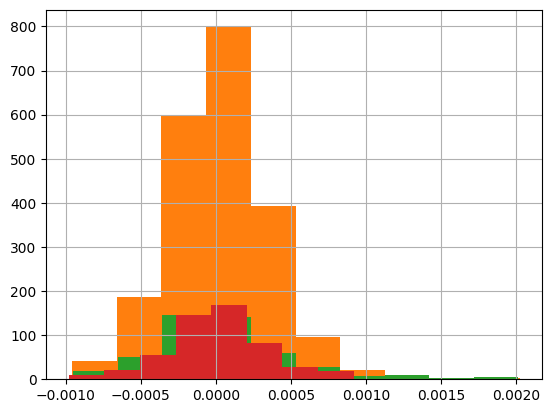

In [27]:
# Plot histograms of 'sulphurdioxide_so2_column_number_density' for each city in the training dataset
# The histograms are grouped by city to visualize the distribution of SO2 column number density across different cities
train.groupby('city')['sulphurdioxide_so2_column_number_density'].hist()


city
Accra      Axes(0.125,0.11;0.775x0.77)
Gulu       Axes(0.125,0.11;0.775x0.77)
Kisumu     Axes(0.125,0.11;0.775x0.77)
Yaoundé    Axes(0.125,0.11;0.775x0.77)
Name: sulphurdioxide_so2_column_number_density, dtype: object

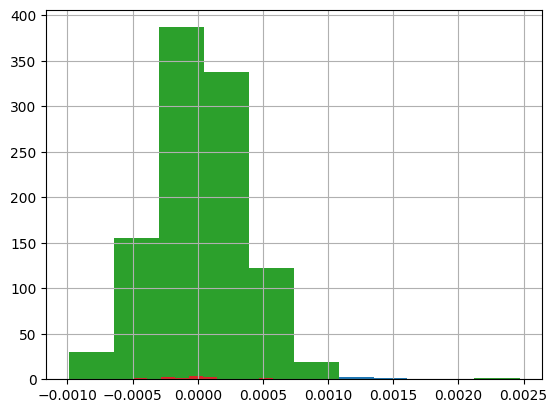

In [28]:
# Plot histograms of 'sulphurdioxide_so2_column_number_density' for each city in the test dataset
# The histograms are grouped by city to examine the distribution of SO2 column number density in the test dataset
test.groupby('city')['sulphurdioxide_so2_column_number_density'].hist()


In [29]:
# Generate descriptive statistics for the training dataset
# The 'describe' method provides summary statistics such as count, mean, standard deviation, min, max, and quartiles for numerical features
train.describe()


,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
count,8071.000000,8071.000000,8071,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,8071.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000,8071.000000,8071.000000
mean,0.635678,30.246982,2023-07-24 12:30:14.496345088,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,27.700157,0.000004,6.122414,0.034887,2200.218221,2041.463881,829573.191993,-8.063021,38.482742,-91.507702,28.609344,0.000074,0.000040,0.000033,0.000130,8836.367723,-0.369219,0.081754,829581.679425,-12.334603,37.299477,-93.711870,28.807872,0.000175,1.046935,0.000109,0.192196,28.036877,-92.363482,40.218543,-2.760999,-0.442617,829596.648655,-12.608537,41.387619,-88.902996,28.385504,0.117739,2.650292,0.316414,228.241939,0

In [30]:
# Generate descriptive statistics for the test dataset
# The 'describe' method provides summary statistics such as count, mean, standard deviation, min, max, and quartiles for numerical features in the test dataset
test.describe()


,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
count,2783.000000,2783.000000,2783,2783.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,2783.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,1.549512,28.547601,2023-09-15 17:14:51.268415488,10.968020,0.000019,0.671654,0.000010,0.096423,-11.358700,40.219066,-86.105632,29.781836,0.000002,7.916277,0.032953,2337.029853,2001.195836,829429.258224,-12.324836,39.913386,-84.622304,29.787402,0.000053,0.000018,0.000034,0.000111,9060.614230,-0.396956,0.056197,829502.219047,-19.960597,39.752012,-86.916801,30.527450,0.000148,1.031356,0.000084,0.143701,29.851396,-86.288536,41.620450,-12.366496,-0.436858,829457.957252,-11.223326,41.865290,-87.867081,29.662178,0.117087,2.672449,0.317350,228.499727,0.330448,-11.629505,41.944202,-88.086102,29.673805,1561.505802,847

<Axes: xlabel='cloud_cloud_base_pressure', ylabel='pm2_5'>

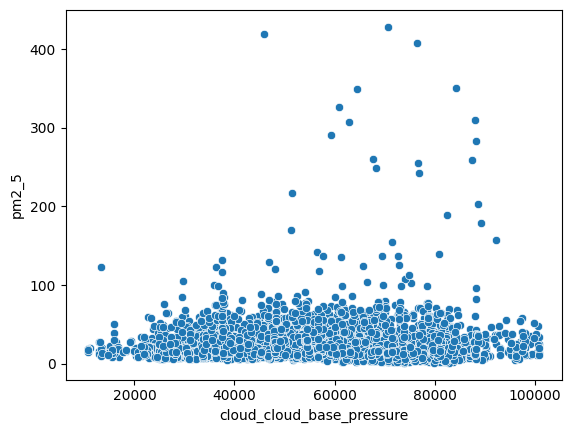

In [32]:
# Create a scatter plot to visualize the relationship between 'cloud_cloud_base_pressure' and 'pm2_5' in the training dataset
# The x-axis represents 'cloud_cloud_base_pressure', and the y-axis represents 'pm2_5' levels
sns.scatterplot(x=train['cloud_cloud_base_pressure'], y=train['pm2_5'])


<Axes: xlabel='sulphurdioxide_so2_column_number_density', ylabel='pm2_5'>

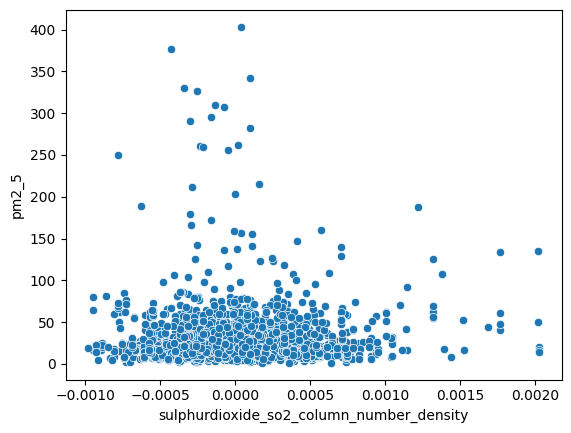

In [34]:
# Create a scatter plot to visualize the relationship between 'sulphurdioxide_so2_column_number_density' and 'pm2_5' in the training dataset
# The x-axis represents 'sulphurdioxide_so2_column_number_density', and the y-axis represents 'pm2_5' levels
sns.scatterplot(x=train['sulphurdioxide_so2_column_number_density'], y=train['pm2_5'])


([<matplotlib.patches.Wedge at 0x30417f490>,
 [Text(-0.1910130855889933, 1.083288512416601, ''),
  Text(-0.37622194259509467, -1.0336619611410558, ''),
  Text(0.9526280900645454, -0.5499997472908298, '')])

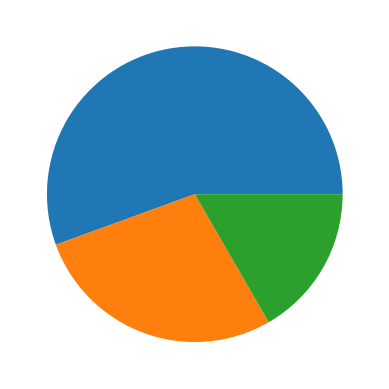

In [35]:
# Create a pie chart to visualize the distribution of three categories with values [20, 10, 6]
# The pie chart displays the proportion of each category relative to the total
plt.pie([20, 10, 6])


<Axes: >

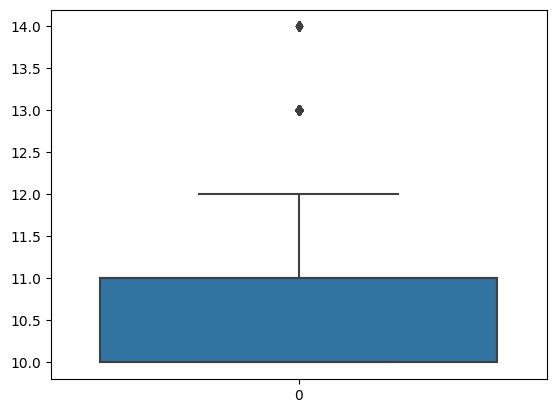

In [36]:
# Create a boxplot to visualize the distribution and identify potential outliers in the 'hour' feature of the training dataset
# The boxplot displays the median, quartiles, and potential outliers for the 'hour' variable
sns.boxplot(train['hour'])


In [39]:
# Select features (X) and target variable (y) for modeling
# X contains all numerical features except 'pm2_5', which is the target variable
# y is the target variable 'pm2_5' from the training dataset
X = train_num_df.drop('pm2_5', axis=1)
y = train['pm2_5']

# Prepare the test dataset by selecting the same features as in the training data
# test_df contains the features used for modeling, ensuring consistency with the training data
test_df = test[X.columns]

# Display the first few rows of the prepared test dataset
test_df.head()


,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,date_day,date_month
0,5.61252,-0.22955,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,25.512329,-0.000028,9.0,0.043537,2825.323242,1.000000,829406.9375,-97.787621,26.897718,-86.884308,25.509418,0.000055,0.000016,0.000040,0.000109,9582.745678,-0.258421,0.019749,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.000243,1.112240,0.000213,0.079645,25.512329,-86.879776,26.926420,-100.330299,-0.258422,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.126056,2.243713,0.286278,230.244171,0.079324,-100.330299,26.926420,-86.879776,25.512329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043065,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511,249,9
1,5.61252,-0.22955,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.036341,2604.788330,1584.809692,829328.6250,70.753090,11.428769,-87.764297,20.935318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408162,829340.750000,76.400116,11.171532,-87.726566,20.951560,0.126282,2.136400,0.273757,230.184377,0.613266,76.400116,11.171532,-87.726566,20.951560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,9
2,5.61252,-0.22955,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,16.417355,-0.000023,9.0,0.037453,3046.314001,90.699029,829194.5625,71.272375,43.172868,-88.964294,16.440554,0.000062,0.000027,0.000036,0.000134,9582.743944,-0.115200,0.163328,829204.480816,73.117264,43.112466,-89.089083,16.41

In [40]:
# Fill missing values in the feature sets with a placeholder value of 999999
# This ensures that missing data does not affect the modeling process
X1 = X.fillna(999999)
t = test_df.fillna(999999)


In [43]:
# Display the shapes of the feature sets after filling missing values
# X1.shape provides the dimensions of the training feature set with missing values filled
# t.shape provides the dimensions of the test feature set with missing values filled
X1.shape, t.shape


((8071, 76), (2783, 76))

In [44]:
# Select a subset of features from X1 for further analysis and modeling
# The selected features include various atmospheric and environmental measurements
df = X1[['site_latitude', 'site_longitude', 'month',
         'carbonmonoxide_co_column_number_density',
         'carbonmonoxide_h2o_column_number_density',
         'carbonmonoxide_sensor_altitude', 'carbonmonoxide_solar_azimuth_angle',
         'nitrogendioxide_tropospheric_no2_column_number_density',
         'nitrogendioxide_tropopause_pressure',
         'nitrogendioxide_solar_azimuth_angle',
         'uvaerosolindex_absorbing_aerosol_index',
         'uvaerosolindex_solar_azimuth_angle', 'ozone_o3_column_number_density',
         'ozone_solar_azimuth_angle', 'cloud_solar_azimuth_angle']]
# This subset includes 15 features relevant for the analysis


In [45]:
import xgboost as xgb

# Split the data into training and test sets
# 90% of the data is used for testing and 10% for training, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.9, random_state=42)

# Initialize the XGBoost Regressor model with a fixed random state for reproducibility
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict target values on the test set
y_pred = xgb_model.predict(X_test)

# Calculate and print the Root Mean Squared Error (RMSE) of the model's predictions on the test set
score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)


Local RMSE: 18.751804120061067


# K-Fold Cross-Validation

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare the dataset
features = X1.copy()  # Features for model training
target = y.copy()     # Target variable

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
y_scaled = np.sqrt(target)  # Apply square root transformation to the target variable

# Apply PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Initialize KFold cross-validation
n_splits = 10
fold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_pred_2 = []  # To store predictions for each fold
oof_pred_2 = []   # To store out-of-fold RMSE for each fold

# Train CatBoostRegressor and evaluate performance using KFold cross-validation
for train_index, test_index in fold.split(X_pca, y_scaled):     
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y_scaled.iloc[train_index], y_scaled.iloc[test_index]

    # Initialize and train CatBoostRegressor
    model_2 = CatBoostRegressor(random_state=42, verbose=0) 
    model_2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=20)

    # Predict and calculate RMSE
    preds = model_2.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print("rmse: ", rmse)
    oof_pred_2.append(rmse)
    
    # Store predictions for the entire dataset
    p3 = model_2.predict(X_pca)  # Ensure 'X_pca' contains the dataset for prediction
    fold_pred_2.append(p3)

# Output the mean RMSE across all folds
print("Mean RMSE across folds:", np.mean(oof_pred_2))


rmse:  1.2917191969609378
rmse:  1.3817144172407645
rmse:  1.1239782493572088
rmse:  1.6837532979528265
rmse:  1.0911405274987869
rmse:  1.4644124996621448
rmse:  1.2786824445313012
rmse:  1.2402554281308782
rmse:  1.390548131963796
rmse:  1.4883138699102603
Mean RMSE across folds: 1.3434518063208905


* Explanation:

 - Standardization and Transformation:

The features are standardized to ensure they have zero mean and unit variance, which helps improve model performance.
The target variable is transformed using the square root to stabilize variance and improve model accuracy.

 - Dimensionality Reduction:

PCA is used to reduce the dimensionality of the feature set while retaining as much variance as possible, which can enhance the model's performance and reduce computational complexity.

 - Cross-Validation:

KFold cross-validation with 10 splits is implemented to ensure that the model's performance is robust and not overly dependent on a specific subset of the data.

 - Model Training and Evaluation:

CatBoostRegressor is trained on each fold, and early stopping is used to prevent overfitting.
The Root Mean Squared Error (RMSE) is calculated for each fold to evaluate the model's performance, and predictions are collected for each fold.

 - Final Output:

The mean RMSE across all folds is calculated to provide an overall measure of the model's performance. This approach ensures a thorough evaluation of the model's performance, accounting for variations in different data subsets, and helps in fine-tuning the model effectively.

# Leave-One-Out Cross-Validation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor

# Prepare the dataset
features = X1.copy()  # Features for model training
target = y.copy()     # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
y_scaled = np.sqrt(target)  # Apply square root transformation to the target variable

# Perform PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

fold_pred_2 = []  # To store predictions for each fold
oof_pred_2 = []   # To store out-of-fold RMSE for each fold

# Train CatBoostRegressor and evaluate performance using LOO-CV
for train_index, test_index in loo.split(X_pca, y_scaled):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y_scaled.iloc[train_index], y_scaled.iloc[test_index]

    # Initialize and train CatBoostRegressor
    model_2 = CatBoostRegressor(random_state=42, verbose=0) 
    model_2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=20)

    # Predict and calculate RMSE
    preds = model_2.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    oof_pred_2.append(rmse)
    
    # Store predictions for the entire dataset
    p3 = model_2.predict(features)  # Ensure 'features' contains the dataset for prediction
    fold_pred_2.append(p3)

# Output the mean RMSE across all folds
print("Mean RMSE across folds:", np.mean(oof_pred_2))


* Explanation:

- Data Preparation:

The features and target variable are copied from the original dataset for preprocessing and model training.
Features are standardized to ensure uniformity in scale, and the target variable is transformed using the square root function to stabilize variance.

- Dimensionality Reduction:

PCA is applied to the standardized features to reduce dimensionality while preserving as much variance as possible.

- Cross-Validation:

Leave-One-Out Cross-Validation (LOO-CV) is used, which involves training the model on all but one data point and testing on the remaining single point. This process is repeated for each data point, providing a thorough evaluation of model performance.

- Model Training and Evaluation:

CatBoostRegressor is trained on each fold, with early stopping applied to prevent overfitting.
Root Mean Squared Error (RMSE) is computed for each fold to assess model performance.
Predictions for the entire dataset are collected to evaluate model performance on the full set.

- Results:

The mean RMSE across all LOO-CV folds is computed to provide an overall measure of model performance. This approach ensures a comprehensive evaluation of the model's ability to generalize, as LOO-CV leverages each data point as a test case, providing an unbiased estimate of model performance.



In [ ]:
# Invert PCA transformation for predictions
# Assuming 'new_data' is your new dataset and has the same features as the training set
new_data_scaled = scaler.transform(t[features.columns])
new_data_pca = pca.transform(new_data_scaled)

# Aggregate predictions from each fold
fold_predictions = []
for fold_index in range(n_splits):
    model_2 = CatBoostRegressor(learning_rate=0.01, random_state=42, verbose=0)
    model_2.fit(X_pca, y_scaled)
    fold_pred = model_2.predict(new_data_pca)
    fold_predictions.append(fold_pred)

# Convert fold_predictions to a numpy array for easier handling
fold_predictions = np.array(fold_predictions)

# Average the predictions from all folds
final_preds = np.mean(fold_predictions, axis=0)

# Ensure final_preds is 2D with shape (n_samples, n_components)
# One approach is to replicate the 1D predictions across n_components
final_preds_2d = np.tile(final_preds.reshape(-1, 1), (1, pca.n_components_))

# Invert the PCA transformation
inv_pca_preds = pca.inverse_transform(final_preds_2d)

# Convert the predictions back to original scale (invert the sqrt transformation)
inv_preds = np.power(inv_pca_preds[:, 0], 2).flatten()  # Using the first component for the inverse

print("Final Predictions for new data:", inv_preds)


- Explanation:

- Data Transformation:

__Scaling New Data__ The new data (new_data) is scaled using the same StandardScaler that was fitted on the training data to ensure consistency in feature scaling.
__PCA Transformation:__ The scaled new data is transformed using the PCA object fitted on the training data, projecting it into the reduced-dimensional space.

- Model Training and Prediction:

__Model Training:__ For each fold, a CatBoostRegressor model is trained on the entire PCA-transformed dataset. The model is used to predict the PCA-transformed new data.
__Aggregating Predictions:__ Predictions from each fold are collected and averaged to get the final predictions. This aggregation helps in reducing variability and improving prediction stability.

- Transforming Predictions Back to Original Space:

__Reshaping Predictions:__ The final 1D predictions are reshaped to a 2D array with the same number of PCA components. This step is necessary for inverting the PCA transformation.
__Inverse PCA Transformation:__ The 2D predictions are transformed back to the original feature space using PCA's inverse transform method.
__Reversing the Square Root Transformation:__ The inverse of the square root transformation is applied to convert predictions back to the original scale.

- Output:

__Final Predictions:__ The final predictions for the new data are printed. These predictions are in the original scale of the target variable. This approach ensures that the predictions are appropriately transformed back to the original feature space and scale, providing meaningful results for the new data.



In [ ]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'new_data' is your new dataset and has the same features as the training set
new_data_scaled = scaler.transform(t[features.columns])  # Scale new data using the fitted scaler
new_data_pca = pca.transform(new_data_scaled)            # Apply PCA transformation

# Define the multiplier for adjusting predictions
multiplier = 4.095  

# Aggregate predictions from each fold
fold_predictions = []
for fold_index in range(n_splits):
    model_2 = CatBoostRegressor(learning_rate=0.01, random_state=42, verbose=0)
    model_2.fit(X_pca, y_scaled)  # Train model on the entire PCA-transformed data
    fold_pred = model_2.predict(new_data_pca) * multiplier  # Adjust predictions with the multiplier
    fold_predictions.append(fold_pred)

# Convert fold_predictions to a numpy array for easier handling
fold_predictions = np.array(fold_predictions)

# Average the predictions from all folds
final_preds = np.mean(fold_predictions, axis=0)

# Ensure final_preds is 2D with shape (n_samples, n_components)
final_preds_2d = np.tile(final_preds.reshape(-1, 1), (1, pca.n_components_))

# Invert the PCA transformation
inv_pca_preds = pca.inverse_transform(final_preds_2d)

# Convert the predictions back to original scale (invert the sqrt transformation)
inv_preds1 = np.power(inv_pca_preds[:, 0], 2).flatten()  # Apply inverse sqrt transformation

print(f"Final Predictions for new data with multiplier {multiplier}:", inv_preds1)


- Explanation:

- Data Transformation:

__Scaling New Data:__ The new data (new_data) is scaled using the previously fitted StandardScaler to match the feature scaling of the training data.
__PCA Transformation:__ The scaled new data is then transformed using the PCA object to match the dimensionality reduction applied during training.

- Prediction Aggregation:

__Model Training:__ For each fold, a CatBoostRegressor model is trained on the PCA-transformed training data.
__Applying Multiplier:__ Predictions for the new data are made using the model and adjusted by multiplying with a specified multiplier (4.095 in this case). This adjustment might be based on domain knowledge or empirical results.

- Processing Predictions:

__Averaging Predictions:__ Predictions from each fold are collected and averaged to obtain the final predictions. Averaging helps to reduce variability and improve prediction stability.

- Transforming Predictions Back:

__Reshaping Predictions:__ The averaged predictions are reshaped to match the PCA component dimensions, allowing for proper inverse transformation.
__Inverse PCA Transformation:__ The reshaped predictions are transformed back to the original feature space using PCA's inverse transform method.
__Reversing Square Root Transformation:__ The final step involves reversing the square root transformation applied to the target variable, converting the predictions back to the original scale.

- Output:

Final Predictions: The adjusted and transformed predictions for the new data are printed. The use of the multiplier is noted in the output for clarity. This approach ensures that the predictions are accurately transformed back to their original scale after incorporating any necessary adjustments, providing meaningful results for new data.



# TensorFlow Decision Forest

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

def split_dataset(dataset, test_ratio=0.65):
    """
    Splits the dataset into training and testing subsets based on a specified ratio.

    Args:
        dataset (pd.DataFrame): The dataset to be split.
        test_ratio (float): The ratio of the dataset to be used for testing (default is 0.65).

    Returns:
        tuple: Two datasets, the first for training and the second for testing.
    """
    # Generate a boolean array where True indicates indices for the test set
    test_indices = np.random.rand(len(dataset)) < test_ratio
    
    # Split the dataset into training and testing subsets
    return dataset[~test_indices], dataset[test_indices]

# Split the dataset into training and validation subsets
train_ds_pd, valid_ds_pd = split_dataset(df)

# Print the number of examples in each subset
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))


# Leave-One-Out Cross-Validation And K-Fold Cross-Validation Combined

In [ ]:
import torch

if __name__ == '__main__':
    # Check for MPS (Metal Performance Shaders) support on the MacOS device
    if torch.backends.mps.is_built() and torch.backends.mps.is_available():
        mps = torch.device("mps")

        # Define the target variable label
        label = 'pm2_5'
        n_samples = len(train_ds_pd)

        # Initialize KFold cross-validation with 5 splits
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        oof_pred_2 = []

        # Iterate through each fold
        for train_index, test_index in kfold.split(train_ds_pd):
            X_train, X_test = ar.iloc[train_index], ar.iloc[test_index]

            # Initialize Leave-One-Out Cross-Validation
            loo = LeaveOneOut()
            loo_preds = []

            # Perform Leave-One-Out Cross-Validation on the training set of the current fold
            for loo_train_index, loo_val_index in loo.split(X_train):
                X_loo_train, X_loo_val = X_train.iloc[loo_train_index], X_train.iloc[loo_val_index]

                # Convert pandas DataFrame to TensorFlow dataset
                train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_loo_train, label=label, task=tfdf.keras.Task.REGRESSION)
                valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_loo_val, label=label, task=tfdf.keras.Task.REGRESSION)

                # Initialize and compile the RandomForestModel
                rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
                rf.compile(metrics=["rmse"])

                # Train the model on the training dataset
                rf.fit(x=train_ds)

                # Evaluate the model on the validation set
                y_val = X_loo_val[label].values
                X_loo_val = X_loo_val.drop(columns=[label])
                val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_loo_val, task=tfdf.keras.Task.REGRESSION)

                # Predict and calculate RMSE for the validation set
                preds = rf.predict(val_ds).squeeze()
                preds1 = preds.flatten()
                rmse = mean_squared_error(y_val, preds1, squared=False)
                loo_preds.append(rmse)

            # Calculate and print the average RMSE of Leave-One-Out Cross-Validation for the current fold
            mean_loo_rmse = np.mean(loo_preds)
            print("Mean LOO-CV RMSE for current fold: ", mean_loo_rmse)

            # Validate on the holdout set of the current k-fold
            train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label=label, task=tfdf.keras.Task.REGRESSION)
            valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label=label, task=tfdf.keras.Task.REGRESSION)

            # Initialize and compile the RandomForestModel
            rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
            rf.compile(metrics=["rmse"])

            # Train the model on the training dataset
            rf.fit(x=train_ds)

            # Evaluate the model on the test set
            y_test = X_test[label].values
            X_test = X_test.drop(columns=[label])
            test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, task=tfdf.keras.Task.REGRESSION)

            # Predict and calculate RMSE for the test set
            preds = rf.predict(test_ds).squeeze()
            preds1 = preds.flatten()
            rmse = mean_squared_error(y_test, preds1, squared=False)
            print("Test RMSE for current fold: ", rmse)
            oof_pred_2.append(rmse)

        # Calculate and print the mean RMSE across all folds
        print("Mean RMSE across all folds: ", np.mean(oof_pred_2))


- Explanation:

- MPS Support Check:
The code begins by verifying if Metal Performance Shaders (MPS) are available on the device, which is relevant for optimizing computations on Apple Silicon devices.

- KFold Cross-Validation: 
It uses KFold cross-validation with 5 splits to ensure that the model's performance is evaluated robustly across different subsets of the data.

- Leave-One-Out Cross-Validation (LOO-CV):
Within each fold of KFold, Leave-One-Out Cross-Validation is employed to further validate the model on each individual sample of the training set, ensuring thorough evaluation and model reliability.

- Model Training and Evaluation: 
The TensorFlow Decision Forests (TF-DF) library is used to create and train a RandomForestModel. Performance metrics, specifically Root Mean Squared Error (RMSE), are calculated to evaluate model accuracy both on validation and test datasets.

- Result Aggregation: 
The code collects RMSE values across all folds and calculates the mean RMSE to provide a comprehensive measure of model performance. 

This approach ensures that the model's performance is thoroughly validated and provides insights into its generalization ability across different subsets of the data.

# Leave-One-Out Cross-Validation 

For the final Model

In [ ]:
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the target variable and initialize KFold cross-validation
label = 'pm2_5'
n_samples = len(train_ds_pd)
fold = KFold(n_splits=n_samples, shuffle=True, random_state=42)

oof_pred_2 = []

# Iterate through each fold of the cross-validation
for train_index, test_index in fold.split(train_ds_pd):
    X_train, X_test = ar.iloc[train_index], ar.iloc[test_index]

    # Convert training and testing data to TensorFlow datasets
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label=label, task=tfdf.keras.Task.REGRESSION)
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label=label, task=tfdf.keras.Task.REGRESSION)

    # Initialize and compile the RandomForestModel
    rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
    rf.compile(metrics=["rmse"])

    # Train the model on the training dataset
    rf.fit(x=train_ds)

    # Prepare the test dataset for evaluation
    y_test = X_test[label].values
    X_test = X_test.drop(columns=[label])
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, task=tfdf.keras.Task.REGRESSION)

    # Predict and calculate RMSE for the test dataset
    preds = rf.predict(test_ds).squeeze()
    preds1 = preds.flatten()
    rmse = mean_squared_error(y_test, preds1, squared=False)
    print("RMSE for the current fold: ", rmse)
    oof_pred_2.append(rmse)

# Compute and print the mean RMSE across all folds
print("Mean RMSE across all folds: ", np.mean(oof_pred_2))


- Explanation:

- Target Variable and Cross-Validation Setup: 
The label variable is defined as 'pm2_5', which is the column name for the target variable. KFold cross-validation is initialized with n_samples splits, where each sample is used as a test set once.

- Data Preparation: 
For each fold, the training and test sets are extracted using KFold.split(), and then converted into TensorFlow datasets suitable for the tfdf.keras.RandomForestModel.

- Model Training: 
The RandomForestModel is compiled with the RMSE metric and trained on the training dataset. This setup ensures that the model is evaluated with respect to its performance in regression tasks.

- Model Evaluation: 
After training, the model is evaluated on the test dataset. Predictions are made, and RMSE is calculated to assess the performance of the model on unseen data.

- Results Aggregation: 
RMSE values are collected for each fold and used to compute the mean RMSE across all folds, providing an overall measure of model performance.

This approach provides a thorough evaluation of the model's performance by ensuring that each data point is used for testing exactly once, leading to a robust assessment of the model's generalization ability.

In [ ]:
# Convert the unseen data to a TensorFlow dataset for regression tasks
nseen_data_ds = tfdf.keras.pd_dataframe_to_tf_dataset(t, task=tfdf.keras.Task.REGRESSION)

# Predicting on unseen data using the trained RandomForestModel
preds00 = rf.predict(nseen_data_ds)


- Dataset Conversion: 
The line tfdf.keras.pd_dataframe_to_tf_dataset(t, task=tfdf.keras.Task.REGRESSION) converts the unseen data t into a TensorFlow dataset suitable for regression tasks. This transformation prepares the data for input into the trained model.

- Prediction: 
The rf.predict(nseen_data_ds) method generates predictions from the trained RandomForestModel on the unseen data. The variable preds00 will contain these predictions, which can be used for further analysis or evaluation.

This process ensures that the trained model is applied to new data to generate predictions, allowing for the assessment of how well the model performs on data it has not encountered during training.

In [ ]:
# Flatten the prediction array for the test set
preds00 = preds00.flatten()


__Flatten Predictions:__ The method flatten() is used to convert the multi-dimensional prediction array preds00 into a one-dimensional array. This step is often necessary to ensure the predictions are in a format suitable for further processing or exporting, such as creating a submission file or performing additional analyses. Flattening is particularly useful when dealing with predictions that may come in higher-dimensional shapes but need to be represented as a simple list or vector for evaluation or output purposes.